In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.worldbank.org/en/programs/debt-statistics/ids#analytical

- I think all these attributes are important but maybe starting to understand which countries are borrowing money especially at a very low interest seems to be a good place to start. So maybe like Use of IMF credit is a good choice. I am assuming that this is interest free credit, I could be wrong. So please correct me?

In [8]:
df = pd.read_excel('.//data//debt_statistics//Bolivia.xlsx', skiprows=1)
df = df.iloc[2:-6, :]
df.head()

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Total External debt stocks,6617.1,8141.8,8884,9895.2,10994.3,12990.1,13248.4,14301.2,15421.1
3,Use of IMF Credit,252.3,252.8,237.8,227.4,220.6,233.7,228.3,227,582.2
4,Long-term external debt,6035.1,7638.6,8357.3,9241.8,10298.6,12486.3,12317.1,13436.9,14261.4
5,Public and publicly guaranteed sector,4189.3,5281.7,5744.9,6335.5,7010.1,9150.7,9905.1,10999.9,11878.4
6,Public sector,4187.6,5280.5,5744.1,6335.1,7010.1,9150.7,9905.1,10999.9,11878.4


In [9]:
years = [i for i in range(2012,2021)]
# I wanted to unpivot to get year & value into 2 columns
df = df.melt(id_vars='Unnamed: 0', value_vars=years, var_name='year',value_name='value')
df['country'] = 'Bolivia'
df.columns = ['debt_statistic','year','value','country']
df = df.drop_duplicates()
df = df[df['value'] != '..']
df.head()

,debt_statistic,year,value,country
0,Total External debt stocks,2012,6617.1,Bolivia
1,Use of IMF Credit,2012,252.3,Bolivia
2,Long-term external debt,2012,6035.1,Bolivia
3,Public and publicly guaranteed sector,2012,4189.3,Bolivia
4,Public sector,2012,4187.6,Bolivia


In [10]:
df[df['debt_statistic'] =='Use of IMF Credit']

,debt_statistic,year,value,country
1,Use of IMF Credit,2012,252.3,Bolivia
65,Use of IMF Credit,2013,252.8,Bolivia
129,Use of IMF Credit,2014,237.8,Bolivia
193,Use of IMF Credit,2015,227.4,Bolivia
257,Use of IMF Credit,2016,220.6,Bolivia
321,Use of IMF Credit,2017,233.7,Bolivia
385,Use of IMF Credit,2018,228.3,Bolivia
449,Use of IMF Credit,2019,227,Bolivia
513,Use of IMF Credit,2020,582.2,Bolivia


In [11]:
def create_debt_dataframe(file_path, country):
    df = pd.read_excel(file_path, skiprows=1)
    df = df.iloc[2:-6, :]
    years = [i for i in range(2012,2021)]
    df = df.melt(id_vars='Unnamed: 0', value_vars=years, var_name='year',value_name='value')
    df['country'] = country
    df.columns = ['debt_statistic','year','value','country']
    df = df.drop_duplicates()
    df = df[df['value'] != '..']
    df[df['debt_statistic'] =='Use of IMF Credit']
    return df

In [12]:
bolivia_df = create_debt_dataframe('.//data//debt_statistics//Bolivia.xlsx', 'Bolivia')
china_df = create_debt_dataframe('.//data//debt_statistics//China.xlsx', 'China')
mexico_df = create_debt_dataframe('.//data//debt_statistics//Mexico.xlsx', 'Mexico')
brazil_df = create_debt_dataframe('.//data//debt_statistics//Brazil.xlsx', 'Brazil')

In [13]:
debt_statistic_df = pd.concat([bolivia_df,china_df,mexico_df,brazil_df])

In [14]:
debt_statistic_df.head()

,debt_statistic,year,value,country
0,Total External debt stocks,2012,6617.1,Bolivia
1,Use of IMF Credit,2012,252.3,Bolivia
2,Long-term external debt,2012,6035.1,Bolivia
3,Public and publicly guaranteed sector,2012,4189.3,Bolivia
4,Public sector,2012,4187.6,Bolivia


<AxesSubplot:xlabel='year', ylabel='value'>

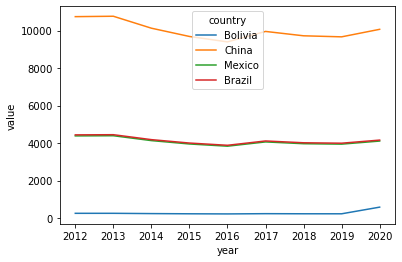

In [15]:
debt_statistic_imf_credit_df = debt_statistic_df[debt_statistic_df['debt_statistic'] =='Use of IMF Credit'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_statistic_imf_credit_df, hue='country')

In [ ]:
# Load Population & normalize the values by population size or GDP??